---

##  Quantum Fourier Transform: The Circuits

_course: quantum cryptography for beginners
<br>date: 29 november 2024
<br>author: burton rosenberg_

---


In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')

import math
import numpy as np
import matplotlib.pyplot as plt



qiskit version: 1.1.2



- [CPhaseGate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.CPhaseGate)
- [circuit.swap](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#swap)

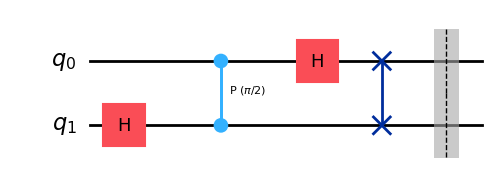

In [4]:
def qft(qc):
    qc.h(1)
    qc.cp(np.pi/2,0,1)
    qc.h(0)
    qc.swap(0,1)
    qc.barrier()
    return qc

def set_n(qc, n):
    i = 0
    while n!=0:
        if n%2==1:
            qc.x(i)
        i += 1
        n = n//2
    qc.barrier()
    return qc

def fft(n):
    vdm = np.zeros((n,n),dtype=np.complex64)
    w = np.exp(2j*math.pi/n)
    for r in range(n): 
        for c in range(n):
            vdm[r][c] = w**(r*c)
    vdm = (1.0/np.sqrt(n))*vdm
    return vdm

q_fft = qft(QuantumCircuit(2))
c_fft = fft(4)

display(q_fft.draw('mpl'))


In [10]:

c_fft = fft(4)

for i in range(4):
    qc = qft(set_n(QuantumCircuit(2),i))
    display(i,Statevector(qc).draw('latex'))
    v = np.array([j==i for j in range(4)]).astype(int)
    w = 2*c_fft.dot(v).round(2)
    display(Math(rf'(1/2)({w[0]}|00\rangle + {w[1]}|01\rangle + {w[2]}|10\rangle + {w[3]}|11\rangle)'))

0

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

1

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

2

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

3

<IPython.core.display.Latex object>

<IPython.core.display.Math object>